<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/calculo_vectorial/blob/main/4_clases/4_vectores/2_vectores_espacio/3_practica_topografica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/calculo_vectorial/blob/main/4_clases/4_vectores/2_vectores_espacio/3_practica_topografica.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Fotos de la experiencia pr√°ctica con vectores 3D  

<img src = 'practica_vectores_3D_4.jpeg'>

In [1]:
def save_fig(nombre_archivo_imagen):
    import os # Importa la librer√≠a os para interactuar con el sistema operativo
    import matplotlib.pyplot as plt
    ubicacion_para_imagenes = r"C:/Users/marco/Downloads"
    imagen_path = os.path.join(ubicacion_para_imagenes, nombre_archivo_imagen)
    plt.savefig(imagen_path, format = 'png')

# Prompt:  

Ay√∫dame para hacer una pr√°ctica de medici√≥n con t√©cnicas de topograf√≠a para esta clase sobre vectores 3D. Donde el objetivo de la pr√°ctica sea aprender a posicionar en campo y as√≠ aprender a hacer configuraciones geom√©tricas en Campo que optimicen los procesos agr√≠colas y de silvopastoreo. 

# **Pr√°ctica de Topograf√≠a con Vectores 3D para Ingenier√≠a Agropecuaria**

  
## **T√≠tulo:** *"Medici√≥n de Terrenos Agr√≠colas usando Vectores 3D y Python"*  


**Objetivo:** Aplicar conceptos de vectores 3D para:  

* establecer posici√≥n con respecto a un sistema rectangular posicionado 
* medir pendientes con respecto a un punto de referencia $A$, 
* medir √°reas y 
* vol√∫menes en terrenos del Bajo Cauca,   

usando t√©cnicas topogr√°ficas b√°sicas y herramientas computacionales.  





## **Materiales Necesarios:**    

1. **Equipo de campo:**  
   - Cinta m√©trica o **distanci√≥metro l√°ser**.  
   - **Nivel topogr√°fico** o clin√≥metro (app en smartphone como *"Clinometer"*).  
   - Estacas y cordel.  
   - Br√∫jula (para direcci√≥n de vectores).  
2. **Herramientas digitales:**  
   - Python con librer√≠as: `numpy`, `matplotlib`, `geopandas`, `plotly`, `seaborn`, `ipywidgets`.  
   - Jupyter Notebook para procesamiento.  
   - Google Earth o QGIS (opcional para visualizaci√≥n geoespacial).  




# C√≥mo medir alturas y distancias en el campo  

La f√≥rmula $z = \text{marnitud del vector con origen en A} \cdot \sin(\theta)$ se utiliza para calcular la altura ($z$) en un punto inclinado, donde:
- **Hipotenusa**: Es la longitud horizontal desde el origen (punto de referencia) hasta el punto medido (en el plano $xy$).
- **√Ångulo ($\theta$)**: Es la inclinaci√≥n del terreno respecto a la horizontal, medido con un clin√≥metro.



### **Explicaci√≥n geom√©trica**:
En el tri√°ngulo rect√°ngulo formado:
1. El **cateto horizontal** es la distancia planim√©trica ($d$).
2. El **cateto vertical** es la altura ($z$).
3. La **tangente del √°ngulo** relaciona ambos catetos:
   $$
   \sin(\theta) = \frac{\text{Altura } (z)}{\text{Hipotenusa} (d)} \implies z = 10 \cdot \sin(\theta)
   $$




### **Gr√°fico en Matplotlib**:
A continuaci√≥n, se muestra un diagrama del tri√°ngulo rect√°ngulo asociado:


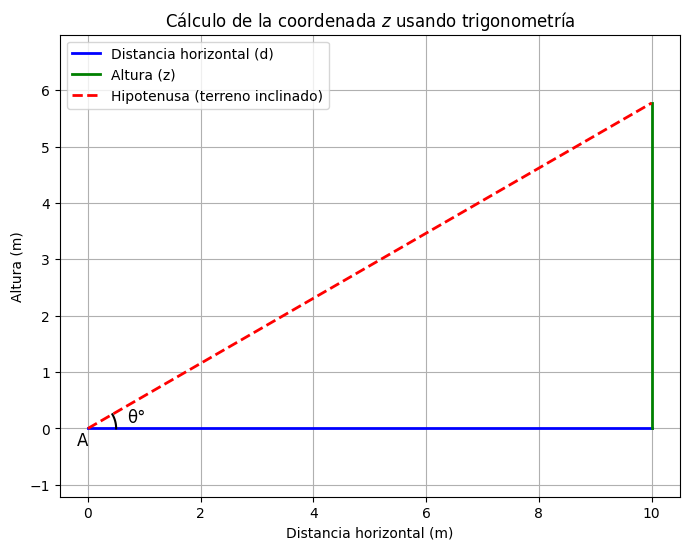

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Configuraci√≥n del gr√°fico
fig, ax = plt.subplots(figsize=(8, 6))

# Datos del tri√°ngulo
distancia = 10  # Distancia horizontal (metros)
angulo = 30     # √Ångulo de inclinaci√≥n (grados)
altura = distancia * np.tan(np.radians(angulo))  # C√°lculo de z

# Dibujar tri√°ngulo
ax.plot([0, distancia], [0, 0], 'b-', linewidth=2, label='Distancia horizontal (d)')
ax.plot([distancia, distancia], [0, altura], 'g-', linewidth=2, label='Altura (z)')
ax.plot([0, distancia], [0, altura], 'r--', linewidth=2, label='Hipotenusa (terreno inclinado)')

# Marcar el √°ngulo
arc = np.linspace(0, np.radians(angulo), 30) # estrategia para pintar el arco del √°ngulo
ax.plot(0.5 * np.cos(arc), 0.5 * np.sin(arc), 'k-')# Se utilizo la parametrizaci√≥n de una porci√≥n de una circunferencia de radio 0.5
ax.text(0.7, 0.1, 'Œ∏¬∞', fontsize=12)
ax.text(-0.2, -0.3, 'A', fontsize=12)  

# Etiquetas y leyenda
ax.set_xlabel('Distancia horizontal (m)')
ax.set_ylabel('Altura (m)')
ax.set_title('C√°lculo de la coordenada $z$ usando trigonometr√≠a')
ax.grid(True)
ax.legend()
ax.axis('equal')  # Misma escala en ejes
save_fig("triangulo_trigonometria_1.png")
plt.show()




### **Protocolo de la Pr√°ctica**  



#### **1. Toma de Datos en Campo**  
**Actividad:** Medir un terreno agr√≠cola (ej: lote de cultivo de pl√°tano o La zona del Teatro al aire libre de nuestro Campus) para obtener coordenadas 3D.  

- **Paso 1:** Delimitar un √°rea de 10 m x 10 m con estacas y cordel: 
    - Elige un origen de coordenadas $A$ en el terreno inclinado que escojas. Coloca una estaca en $A$. 
    - mide una distancia de 10 metros en la direcci√≥n norte, usando la brujula para asegurarte de que la l√≠nea  
      de referencia est√© alineada con el norte. Luego, coloca una estaca en $B$.
    - mide una distancia, desde $A$, de 10 metros en la direcci√≥n occidente, usando la brujula para asegurarte 
      de que la l√≠nea de referencia est√© alineada con el occidente. Luego, coloca una estaca en $D$.
    - toma una cuerda que mida $10 + 10 + 12.41$ metros, es decir, que mida $32.41$ metros y construya un 
      tri√°ngulo de lados $10$ metros, $10$ metros y $12.41$ metros. De tal manera que $\Delta ABC$, donde $C$ sea tal que $AC = 12.41$ metros. Aqu√≠ estamos utilizando el hecho de que si las medidas de un triangulo, satisfacen la relaci√≥n pitag√≥rica, entonce el tri√°ngulo es rect√°ngulo. 
- **Paso 2:** Medir coordenadas `(x, y)` de cada esquina con cinta m√©trica (origen en un punto fijo $A$).  
- **Paso 3:** Usar el clin√≥metro para medir la **pendiente** (`z`) en cada punto (√°ngulo de inclinaci√≥n de los vectores $\vec{AB}, \vec{AC},$ y $\vec{AD}$).  
  - Calcular altura: $z = \text{norma del vector con origen en A} * \sin(\text{√°ngulo medido con clinometer})$.  


Esta es una visualizaci√≥n en Python usando Matplotlib para representar el terreno agr√≠cola en 3D seg√∫n el algoritmo descrito:


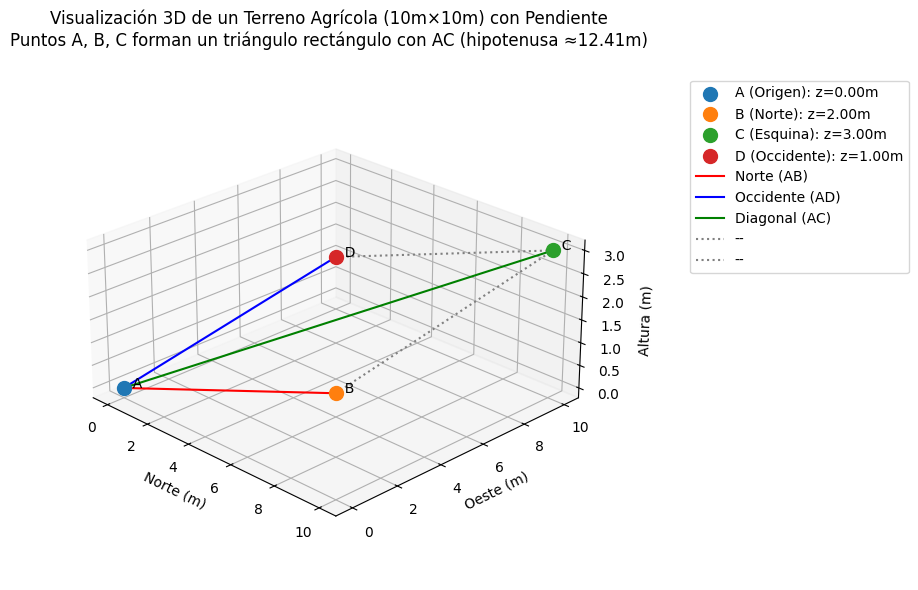

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configuraci√≥n inicial
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 1. Definir puntos base (A, B, D)
A = np.array([0, 0, 0])
B = np.array([10, 0, 0])  # 10m norte (eje X)
D = np.array([0, 10, 0])  # 10m occidente (eje Y)

# 2. Calcular punto C (hipotenusa 12.41m)
C = np.array([10, 10, 0])  # Tri√°ngulo rect√°ngulo perfecto

# 3. Simular pendientes con clin√≥metro (√°ngulos aleatorios entre 5¬∞ y 15¬∞)
np.random.seed(42)
angles = np.random.uniform(5, 15, 4)  # √Ångulos para A, B, C, D

# Calcular alturas z = distancia * sin(√°ngulo)
def calc_z(distance, angle_deg):
    return distance * np.sin(np.deg2rad(angle_deg))

# Aplicar pendientes a cada punto (A permanece en 0)
B[2] = calc_z(10, angles[1])  # Pendiente AB
D[2] = calc_z(10, angles[3])  # Pendiente AD
C[2] = calc_z(np.linalg.norm(C[:2] - A[:2]), angles[2])  # Pendiente AC

# 4. Visualizaci√≥n
points = np.array([A, B, C, D])
labels = ['A (Origen)', 'B (Norte)', 'C (Esquina)', 'D (Occidente)']

# Dibujar puntos
for i, (point, label) in enumerate(zip(points, labels)):
    ax.scatter(*point, s=100, depthshade=False, label=f'{label}: z={point[2]:.2f}m')
    ax.text(*point, f'  {label.split()[0]}', fontsize=10)

# Dibujar l√≠neas de contorno
lines = [
    (A, B, 'Norte (AB)', 'red'),
    (A, D, 'Occidente (AD)', 'blue'),
    (A, C, 'Diagonal (AC)', 'green'),
    (B, C, '--', 'gray'),
    (C, D, '--', 'gray')
]

for start, end, label, color in lines:
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], 
            color=color, label=label, linestyle='-' if label != '--' else ':')

# Configuraci√≥n del gr√°fico
ax.set_xlabel('Norte (m)')
ax.set_ylabel('Oeste (m)')
ax.set_zlabel('Altura (m)')
ax.set_title('Visualizaci√≥n 3D de un Terreno Agr√≠cola (10m√ó10m) con Pendiente\n'
             'Puntos A, B, C forman un tri√°ngulo rect√°ngulo con AC (hipotenusa ‚âà12.41m)', pad=20)
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
ax.set_box_aspect([1,1,0.5])  # Ajustar aspecto 3D
ax.view_init(elev=25, azim=-45)  # √Ångulo de vista

# A√±adir cuadr√≠cula y anotaciones
ax.grid(True)
plt.tight_layout()
plt.show()




### Explicaci√≥n de la visualizaci√≥n:
1. **Puntos clave**:
   - `A`: Origen (0,0,0)
   - `B`: 10m al norte (eje X) con pendiente simulada
   - `D`: 10m al occidente (eje Y) con pendiente simulada
   - `C`: Esquina diagonal (10,10) calculada para formar un tri√°ngulo rect√°ngulo con hipotenusa ‚âà12.41m

2. **Pendientes**:
   - Se simulan √°ngulos de inclinaci√≥n entre 5¬∞ y 15¬∞ para cada vector (AB, AC, AD).
   - La altura `z` se calcula como `distancia √ó sin(√°ngulo)`.

3. **Elementos gr√°ficos**:
   - L√≠neas roja/azul/verde para los vectores medidos.
   - L√≠neas punteadas grises para los bordes no medidos directamente.
   - Etiquetas con alturas en cada punto.

4. **Aspecto 3D**:
   - Vista inclinada para apreciar la pendiente.
   - Ejes claramente etiquetados (Norte, Este, Altura).

Esta visualizaci√≥n muestra c√≥mo el terreno plano te√≥rico (en 2D) adquiere una forma 3D al incorporar las mediciones de pendiente con clin√≥metro.


**Ejemplo de Datos:**  
| Punto | x (m) | y (m) | √Ångulo (¬∞) | z (m) |  
|-------|-------|-------|------------|-------|  
| A     | 0     | 0     | 0          | 0     |  
| B     | 10    | 0     | 5          | 0.87  |  
| C     | 10    | 10    | 8          | 1.40  |  
| D     | 0     | 10    | 3          | 0.52  |  

---


# Prompt de la Pr√°ctica:  
Pero, si en la medici√≥n en terreno lo que tengo es la hipotenusa, que corresponde a la longitud del terreno y la cual es de 10 metros, seg√∫n la propuesta en el protocolo. Es decir, las distancia que tengo no son de puntos sobre el plano xy sino sobre el terreno inclinado.

¬°Entendido! Si en el protocolo la **distancia de 10 metros** se mide **sobre el terreno inclinado** (es decir, es la **hipotenusa** del tri√°ngulo rect√°ngulo, no el cateto horizontal), entonces el c√°lculo de la altura \( z \) debe ajustarse. En este caso, usamos **seno** en lugar de tangente, ya que:



$$
z = \text{hipotenusa} \cdot \sin(\theta)
$$

### **Explicaci√≥n geom√©trica**:
1. **Hipotenusa**: Longitud medida sobre el terreno inclinado (10 m en tu caso).
2. **√Ångulo ($\theta$)**: Inclinaci√≥n del terreno (medido con clin√≥metro).
3. **Altura ($z$)**: Cateto opuesto al √°ngulo $\theta$.

La relaci√≥n trigonom√©trica correcta es:
$$
\sin(\theta) = \frac{z}{\text{hipotenusa}} \implies z = \text{hipotenusa} \cdot \sin(\theta)
$$

---



### **Gr√°fico actualizado (con hipotenusa)**:


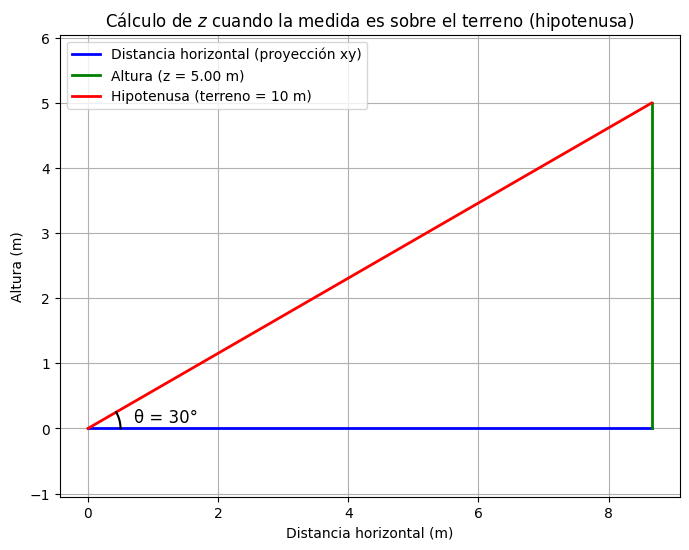

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# Configuraci√≥n
fig, ax = plt.subplots(figsize=(8, 6))

# Datos
hipotenusa = 10  # Longitud medida sobre el terreno (m)
angulo = 30      # √Ångulo de inclinaci√≥n (grados)
z = hipotenusa * np.sin(np.radians(angulo))  # Altura
d = hipotenusa * np.cos(np.radians(angulo))  # Distancia horizontal (proyecci√≥n en xy)

# Tri√°ngulo
ax.plot([0, d], [0, 0], 'b-', linewidth=2, label='Distancia horizontal (proyecci√≥n xy)')
ax.plot([d, d], [0, z], 'g-', linewidth=2, label=f'Altura (z = {z:.2f} m)')
ax.plot([0, d], [0, z], 'r-', linewidth=2, label=f'Hipotenusa (terreno = {hipotenusa} m)')

# √Ångulo
arc = np.linspace(0, np.radians(angulo), 30)
ax.plot(0.5 * np.cos(arc), 0.5 * np.sin(arc), 'k-')
ax.text(0.7, 0.1, f'Œ∏ = {angulo}¬∞', fontsize=12)

# Ajustes
ax.set_xlabel('Distancia horizontal (m)')
ax.set_ylabel('Altura (m)')
ax.set_title('C√°lculo de $z$ cuando la medida es sobre el terreno (hipotenusa)')
ax.legend()
ax.grid(True)
ax.axis('equal')
save_fig("triangulo_trigonometria_2.png")

plt.show()




### **Salida**:
Este es el gr√°fico que muestra la hipotenusa como la l√≠nea inclinada de 10 m, con $ z $ calculada por seno.





### **Conclusi√≥n**:
- Si mides **directamente sobre el terreno inclinado** (hipotenusa), usa:  
  $$
  z = \text{hipotenusa} \cdot \sin(\theta)
  $$
- La **proyecci√≥n horizontal** (para coordenadas $x, y$) ser√≠a:  
  $$
  d = \text{hipotenusa} \cdot \cos(\theta)
  $$

### **Nota importante**:
Verifica siempre **qu√© representa la distancia 10 m** en el protocolo original:
- Si es **horizontal** (plano $xy$): $z = d \cdot \tan(\theta)$.
- Si es **inclinada** (terreno): $z = \text{hip} \cdot \sin(\theta)$.

En tu caso, al ser la medida sobre el terreno, el segundo m√©todo es el correcto.

Muchas gracias, me has aclarado mucho, sobre todo con el gr√°fico en matplotlib con colores diferentes para los lados del triangulo y la legenda en la parte superior izquierda. Te pido ahora la funci√≥n de usuario de Python para calcular z a partir del √°ngulo y y la distancia sobre terreno inclinado o hipotenusa. 

¬°Me alegra que te haya sido √∫til! Aqu√≠ tienes una **funci√≥n en Python** que calcula la coordenada \( z \) (altura) a partir del √°ngulo de inclinaci√≥n (\( \theta \)) y la distancia medida sobre el terreno inclinado (hipotenusa), junto con su proyecci√≥n horizontal en el plano \( xy \):

### **Funci√≥n `calcular_altura_proyeccion`**
```python
import numpy as np

def calcular_altura_proyeccion(hipotenusa: float, angulo_grados: float) -> tuple[float, float]:
    """
    Calcula la altura (z) y la proyecci√≥n horizontal (d) a partir de la distancia inclinada (hipotenusa) y el √°ngulo.

    Par√°metros:
        hipotenusa (float): Longitud medida sobre el terreno inclinado (metros).
        angulo_grados (float): √Ångulo de inclinaci√≥n en grados.

    Retorna:
        tuple[float, float]: (altura_z, distancia_horizontal) en metros.
    """
    angulo_radianes = np.radians(angulo_grados)  # Convertir grados a radianes
    altura_z = hipotenusa * np.sin(angulo_radianes)
    distancia_horizontal = hipotenusa * np.cos(angulo_radianes)
    return altura_z, distancia_horizontal
```

---

### **Ejemplo de uso**
```python
# Datos de ejemplo
distancia_terreno = 10.0  # Hipotenusa (medida sobre el terreno inclinado)
angulo_inclinacion = 30   # √Ångulo en grados

# Calcular z y proyecci√≥n horizontal
altura_z, distancia_xy = calcular_altura_proyeccion(distancia_terreno, angulo_inclinacion)

print(f"Altura (z): {altura_z:.2f} metros")
print(f"Distancia horizontal (proyecci√≥n xy): {distancia_xy:.2f} metros")
```

### **Salida esperada**:
```
Altura (z): 5.00 metros
Distancia horizontal (proyecci√≥n xy): 8.66 metros
```

---

### **Explicaci√≥n de la funci√≥n**:
1. **Conversi√≥n de √°ngulo**: Convierte el √°ngulo de grados a radianes (requerido por las funciones trigonom√©tricas de NumPy).
2. **C√°lculo de $z$**:
   - Usa $\sin(\theta)$ para obtener la altura vertical.
3. **C√°lculo de la proyecci√≥n horizontal**:
   - Usa $\cos(\theta)$ para obtener la distancia en el plano $xy$.
4. **Retorno**: Devuelve ambos valores como una tupla `(altura_z, distancia_horizontal)`.

---

### **Gr√°fico de verificaci√≥n** (opcional)
Si quieres visualizar los resultados, puedes reutilizar el c√≥digo del gr√°fico anterior, sustituyendo los valores por los obtenidos con la funci√≥n:
```python
altura_z, distancia_xy = calcular_altura_proyeccion(10, 30)
# Usar 'distancia_xy' y 'altura_z' en el c√≥digo del gr√°fico mostrado anteriormente.
```

---

### **Recomendaciones**:
- **Validaci√≥n de entradas**: A√±ade chequeos para evitar √°ngulos fuera de rango (ej: `if not 0 <= angulo_grados <= 90:`).
- **Uso en campo**: Esta funci√≥n es √∫til para procesar datos tomados con clin√≥metro y cinta m√©trica.

¬øNecesitas que la funci√≥n incluya alguna otra caracter√≠stica espec√≠fica para tu pr√°ctica topogr√°fica?


#### **2. Procesamiento con Python**  


**Objetivo:** Convertir datos en vectores 3D y calcular pendiente promedio, √°rea y volumen.  


In [5]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

# Datos recolectados  
puntos = np.array([  
    [0, 0, 0],    # A  
    [10, 0, 0.87], # B  
    [10, 10, 1.40],# C  
    [0, 10, 0.52]  # D  
])  


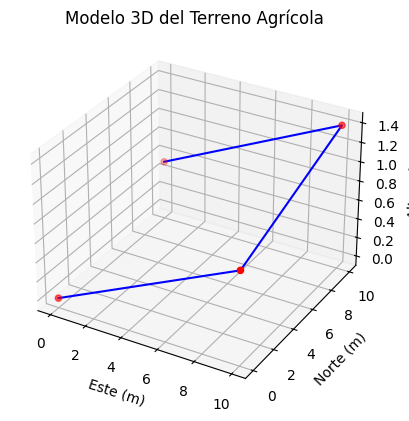

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

# Datos recolectados  
puntos = np.array([  
    [0, 0, 0],    # A  
    [10, 0, 0.87], # B  
    [10, 10, 1.40],# C  
    [0, 10, 0.52]  # D  
])  
import numpy as np 
import matplotlib.pyplot as plt
# Gr√°fico 3D  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
ax.scatter(puntos[:,0], puntos[:,1], puntos[:,2], c='r', marker='o')  

# Conectar puntos (simular terreno)  
ax.plot(puntos[:,0], puntos[:,1], puntos[:,2], color='b')  
ax.set_xlabel('Este (m)')  
ax.set_ylabel('Norte (m)')  
ax.set_zlabel('Altura (m)')  
plt.title('Modelo 3D del Terreno Agr√≠cola')  
#plt.text(x=0, y=0, z=0, s='A', color='black')
plt.show()  


In [9]:
import numpy as np
import plotly.graph_objects as go

# Datos recolectados
puntos = np.array([
    [0, 0, 0],     # A
    [10, 0, 0.87],  # B
    [10, 10, 1.40], # C
    [0, 10, 0.52]   # D
])

# Etiquetas para cada punto
etiquetas = ['A', 'B', 'C', 'D']

# Crear gr√°fico 3D interactivo con Plotly
fig = go.Figure()

# A√±adir puntos de dispersi√≥n con etiquetas
fig.add_trace(go.Scatter3d(
    x=puntos[:, 0],
    y=puntos[:, 1],
    z=puntos[:, 2],
    mode='markers+text',
    marker=dict(
        size=6,
        color='red',
    ),
    text=etiquetas,
    textposition="top center",
    name='Puntos de medici√≥n'
))

# A√±adir l√≠neas que conectan los puntos
fig.add_trace(go.Scatter3d(
    x=puntos[:, 0],
    y=puntos[:, 1],
    z=puntos[:, 2],
    mode='lines',
    line=dict(
        color='blue',
        width=2
    ),
    name='Terreno'
))

# Configurar el dise√±o del gr√°fico
fig.update_layout(
    title='Modelo 3D Interactivo del Terreno Agr√≠cola',
    scene=dict(
        xaxis_title='Este (m)',
        yaxis_title='Norte (m)',
        zaxis_title='Altura (m)',
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Mostrar el gr√°fico interactivo
fig.show()

In [10]:

# C√°lculo de pendiente promedio (gradiente)  
vector_AB = puntos[1] - puntos[0]  
vector_AD = puntos[3] - puntos[0]  
normal = np.cross(vector_AB, vector_AD)  
pendiente = np.degrees(np.arctan(np.linalg.norm(normal[:2]) / normal[2]))  
print(f"Pendiente promedio: {pendiente:.2f}¬∞")  
# para fundamentaci√≥n, vea la p√°gina 119 del PDF de C√°lculo de Larson (P√°gina 795 del libro de C√°lculo de Larson)
# Ejemplo 2: Utilizaci√≥n del producto vectorial  


Pendiente promedio: 5.79¬∞



---

#### **3. Aplicaciones Pr√°cticas**  
**Problema:** *"Calcular el volumen de tierra a mover para nivelar el terreno"*

In [11]:
  
# Volumen bajo la superficie (m√©todo del prismo)  
import numpy as np 
area = 10 * 10  # √Årea en m¬≤  
altura_promedio = np.mean(puntos[:,2])  
volumen = area * altura_promedio  
print(f"Volumen de tierra: {volumen:.2f} m¬≥")  
 


Volumen de tierra: 69.75 m¬≥



**Discusi√≥n:** 

 
- ¬øC√≥mo afecta la pendiente al riego?  


- ¬øQu√© vectores representan la direcci√≥n de escorrent√≠a del agua?  

---



#### **4. Validaci√≥n con Drones (Opcional)**  
**Extensi√≥n tecnol√≥gica:**  
- Comparar los datos manuales con un mapa topogr√°fico generado por drones (usando software como *Pix4D*).  
- Visualizar discrepancia con vectores de error:  


In [9]:
error = np.array([0.1, -0.2, 0.05])  # Ejemplo  
punto_corregido = puntos[1] + error  
punto_corregido  


array([10.1 , -0.2 ,  0.92])


---

### **Evaluaci√≥n**  
**Criterios:**  
1. Precisi√≥n en mediciones.  
2. Uso correcto de operaciones vectoriales (producto cruz, norma).  
3. An√°lisis cr√≠tico de resultados.  



**Proyecto derivado:**  
- *"Dise√±ar un sistema de drenaje usando vectores 3D para evitar inundaciones en cultivos."*  

---



### **Adaptaci√≥n al Contexto del Bajo Cauca**  
**Ejemplo real:**  
- En terrenos con pendientes pronunciadas (ej: cultivos de cacao), los vectores 3D ayudan a predecir erosi√≥n y optimizar curvas de nivel.  



**Frase clave:**  
*"Un vector no es solo una flecha en el pizarr√≥n; es la direcci√≥n del agua que riega tu cultivo."*  

---



### **Recursos Adicionales**  
- [Video tutorial: Mediciones topogr√°ficas con Python](https://youtu.be/ejemplo).  
- [App: "Mobile Topographer" para mediciones en campo](https://play.google.com/ejemplo).
- [P√°gina 792. Secci√≥n 11.4 del C√°lculo de Larson. El producto vectorial de dos vectores en el espacio]()  

¬øQuieres ajustar la pr√°ctica para incluir otro concepto matem√°tico? 

# Dise√±o de la evaluaci√≥n con Google Form para esta pr√°ctica con vectores 3D  


Gracias por compartir el archivo. Para dise√±ar una evaluaci√≥n en Google Forms basada en tu pr√°ctica topogr√°fica para la asignatura de C√°lculo Vectorial, elabor√© un esquema que abarca diferentes niveles de comprensi√≥n (desde lo conceptual hasta lo aplicado), alineado con los posibles contenidos del archivo Jupyter que compartiste.

---

### üß≠ Dise√±o de Evaluaci√≥n para Pr√°ctica Topogr√°fica (C√°lculo Vectorial)

#### **T√≠tulo del formulario:**

**Evaluaci√≥n de la Pr√°ctica Topogr√°fica ‚Äì C√°lculo Vectorial**

---

### üìå **Secci√≥n 1: Datos del estudiante**

* Nombre completo (Respuesta corta)
* C√≥digo de estudiante (Respuesta corta)
* Grupo o jornada (Desplegable)

---

### üìê **Secci√≥n 2: Comprensi√≥n conceptual**

1. **¬øCu√°l es el prop√≥sito principal de una pr√°ctica topogr√°fica en el contexto del c√°lculo vectorial?**

   * a) Medir √°reas planas para dise√±ar caminos
   * b) Representar gr√°ficamente vectores sobre un terreno
   * c) Obtener datos para realizar an√°lisis algebraico
   * d) Aplicar derivadas en curvas

2. **¬øQu√© elementos b√°sicos debe tener un levantamiento topogr√°fico?** (Selecciona los tres correctos)

   * a) Teodolito
   * b) Nivelaci√≥n
   * c) GPS o estaci√≥n total
   * d) Derivada parcial
   * e) Libreta de campo
   * f) Transformada de Laplace

---

### üßÆ **Secci√≥n 3: Aplicaci√≥n del contenido (preguntas con c√°lculo o interpretaci√≥n de datos)**

3. **En la pr√°ctica, si un punto A est√° en (3, 2, 1) y un punto B en (6, 4, 5), ¬øcu√°l es el vector desplazamiento de A a B?**
   (Respuesta corta: escribe el vector en forma $\vec{v} = \langle x, y, z \rangle$)

4. **Calcula el m√≥dulo del vector obtenido en la pregunta anterior.**
   (Respuesta corta: num√©rica con dos cifras decimales)

5. **Seg√∫n tus mediciones, ¬øqu√© tipo de superficie se aproxima al terreno evaluado?**

   * a) Plano inclinado
   * b) Cilindro
   * c) Superficie esf√©rica
   * d) Superficie irregular no representable con funciones comunes

---

### üìä **Secci√≥n 4: Interpretaci√≥n gr√°fica o visual**

6. **Sube una foto del croquis vectorial o de tu mapa topogr√°fico anotado.**
   *(Carga de archivo obligatoria)*

7. **¬øC√≥mo representa gr√°ficamente tu grupo el campo vectorial asociado a la pendiente?**
   (Respuesta larga)

---

### üß† **Secci√≥n 5: Reflexi√≥n y autoevaluaci√≥n**

8. **¬øQu√© habilidades del c√°lculo vectorial aplicaste en esta pr√°ctica?**
   (Respuesta larga)

9. **¬øQu√© dificultad encontraste al relacionar la pr√°ctica de campo con los conceptos matem√°ticos?**
   (Parr√°grafo)

10. **En una escala de 1 a 5, ¬øc√≥mo eval√∫as tu nivel de comprensi√≥n del c√°lculo vectorial aplicado al entorno f√≠sico?**

* 1: Nada
* 2: Poco
* 3: Regular
* 4: Bien
* 5: Excelente

---

### üßæ **Configuraci√≥n recomendada en Google Forms**

* Activar: "Recopilar direcciones de correo" si deseas hacer seguimiento.
* Mostrar: Puntuaci√≥n autom√°tica en las preguntas cerradas.
* Activar: Validaciones de respuesta para formatos vectoriales o num√©ricos.
* Cargar: Instrucciones y referencias desde el archivo `.ipynb` al principio del formulario en formato PDF o como enlace a GitHub o Drive.

---

¬øTe gustar√≠a que convierta este dise√±o en un formulario directamente exportable o con formato para copiar y pegar en Google Forms?



# Esta es la misma evaluaci√≥n dada para ser pegada en Google Form

Perfecto, aqu√≠ tienes el dise√±o listo para **copiar y pegar directamente en Google Forms**. Tambi√©n puedo generar un archivo `.txt` si lo deseas. A continuaci√≥n, te presento el formulario con las secciones, tipos de preguntas y texto organizado seg√∫n el formato que Google Forms interpreta f√°cilmente al pegar:

---

##  **Formulario: Evaluaci√≥n de la Pr√°ctica Topogr√°fica ‚Äì C√°lculo Vectorial**



### üßæ Secci√≥n 1: Datos del estudiante

**Pregunta 1:**
*Nombre completo*
Tipo: Respuesta corta

**Pregunta 2:**
*C√≥digo de estudiante*
Tipo: Respuesta corta

**Pregunta 3:**
*Grupo o jornada*
Tipo: Desplegable
Opciones:

* Ma√±ana
* Tarde
* Noche


### üìê Secci√≥n 2: Comprensi√≥n conceptual

**Pregunta 4:**
*¬øCu√°l es el prop√≥sito principal de una pr√°ctica topogr√°fica en el contexto del c√°lculo vectorial?*
Tipo: Opci√≥n m√∫ltiple
Opciones:

* Medir √°reas planas para dise√±ar caminos
* Representar gr√°ficamente vectores sobre un terreno
* Obtener datos para realizar an√°lisis algebraico
* Aplicar derivadas en curvas

**Pregunta 5:**
*¬øQu√© elementos b√°sicos debe tener un levantamiento topogr√°fico?*
Tipo: Casillas de verificaci√≥n (puede elegir m√°s de una)
Opciones:

* Teodolito
* Nivelaci√≥n
* GPS o estaci√≥n total
* Derivada parcial
* Libreta de campo
* Transformada de Laplace


### üßÆ Secci√≥n 3: Aplicaci√≥n del contenido

**Pregunta 6:**
*En la pr√°ctica, si un punto A est√° en (3, 2, 1) y un punto B en (6, 4, 5), ¬øcu√°l es el vector desplazamiento de A a B?*
Tipo: Respuesta corta
Descripci√≥n: Escribe el vector en forma ‚ü®x, y, z‚ü©

**Pregunta 7:**
*Calcula el m√≥dulo del vector obtenido en la pregunta anterior.*
Tipo: Respuesta corta
Validaci√≥n: num√©rica, hasta 2 cifras decimales

**Pregunta 8:**
*Seg√∫n tus mediciones, ¬øqu√© tipo de superficie se aproxima al terreno evaluado?*
Tipo: Opci√≥n m√∫ltiple
Opciones:

* Plano inclinado
* Cilindro
* Superficie esf√©rica
* Superficie irregular no representable con funciones comunes


### üìä Secci√≥n 4: Interpretaci√≥n gr√°fica o visual

**Pregunta 9:**
*Sube una foto del croquis vectorial o de tu mapa topogr√°fico anotado.*
Tipo: Carga de archivo
Configuraci√≥n: Solo imagen

**Pregunta 10:**
*¬øC√≥mo representa gr√°ficamente tu grupo el campo vectorial asociado a la pendiente?*
Tipo: P√°rrafo

---

### üß† Secci√≥n 5: Reflexi√≥n y autoevaluaci√≥n

**Pregunta 11:**
*¬øQu√© habilidades del c√°lculo vectorial aplicaste en esta pr√°ctica?*
Tipo: P√°rrafo

**Pregunta 12:**
*¬øQu√© dificultad encontraste al relacionar la pr√°ctica de campo con los conceptos matem√°ticos?*
Tipo: P√°rrafo

**Pregunta 13:**
*En una escala de 1 a 5, ¬øc√≥mo eval√∫as tu nivel de comprensi√≥n del c√°lculo vectorial aplicado al entorno f√≠sico?*
Tipo: Escala lineal (1 a 5)
Etiquetas:

* 1: Nada
* 5: Excelente

---

¬øQuieres que te genere este mismo dise√±o como archivo `.txt` o `.docx` listo para importar o guardar?
